In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap, cm
import pyowm
import time
import datetime

#Retrieve api-key
with open('api-key/owm-api-key.txt', 'r') as key_file:
    key = key_file.read()

owm = pyowm.OWM(key)

In [2]:
#Read cities list
cities = pd.read_csv("data/cities.csv", ';')
valid_cities = []

dic = owm.city_id_registry()

In [3]:
dfrows = []
for index, row in cities.iterrows():
    lookup = dic.locations_for(row['City'].decode("utf-8"))
    if lookup==[]:
        print(row['City'])
    else:
        dfrows.append([lookup[0]])
        valid_cities.append(lookup[0])

In [54]:
#Get the observations for each city via the OWM API
observation_list = []
id20s = []
elt_id20 = []
c = 0
ids = []

#for city in valid_cities:
#    ids.append(city.get_ID())
for row in dfrows:
    cit = row[0]
    row.append(cit.get_ID())
    row.append(cit.get_lat())
    row.append(cit.get_lon())

#Regroup IDs in lists of 20, maximum observation number per query
for c in range(0, len(dfrows)):
    elt_id20.append(dfrows[c][1])
    if len(elt_id20) == 20 or c == len(dfrows)-1:
        id20s.append(elt_id20)
        elt_id20 = []
    c = c + 1

AttributeError: 'float' object has no attribute 'isdigit'

In [20]:
for id20 in id20s:
    temp = owm.weather_at_ids(id20)
    time.sleep(1)
    observation_list.append(temp)

In [21]:
#Get weather and temperature for each city
weathers = []
temps = []

for obss in observation_list:
    for obs in obss:
        weathers.append(obs.get_weather())
        
for weather in weathers:
    temps.append(weather.get_temperature(unit='celsius'))
    
for c in range(0, len(dfrows)):
    dfrows[c].append(temps[c]['temp'])

In [22]:
df = pd.DataFrame(dfrows, columns=['City', 'ID', 'Lat', 'Lon', 'Temp'])


In [30]:
x = datetime.datetime.now()
df.to_csv('data/Temp-%d_%d_%d-%d_%d.csv' % (x.year, x.month, x.day, x.hour, x.minute))

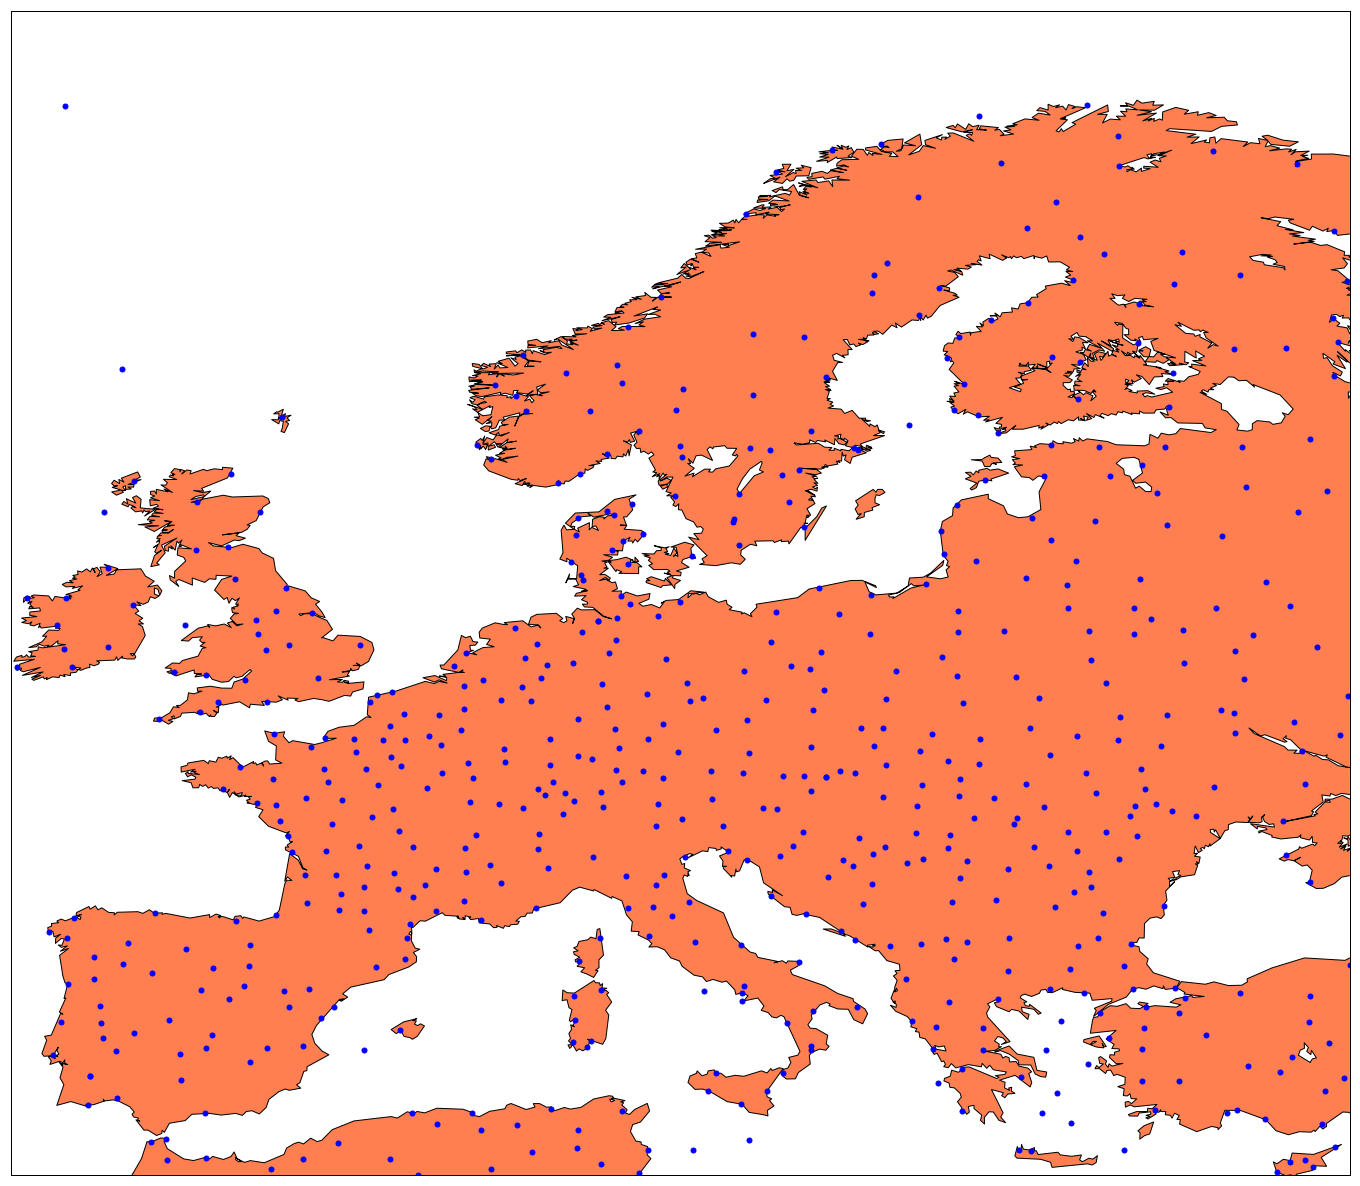

In [33]:
#Plot the cities on a map
plt.figure(figsize=(24,24))
map = Basemap(llcrnrlon=-10.56,llcrnrlat=34.65,urcrnrlon=34.88,urcrnrlat=74.17, resolution = 'l', epsg=4668)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='coral',lake_color='white')
map.drawcoastlines()
x, y = map(df['Lon'], df['Lat'])
map.plot(x, y, 'bo', markersize=5)